In [51]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [44]:
H = 0.51 # meters
L = 5.59 # meters

lightWavelength = 633e-9 # m
waterDensity = 998.2 # kg m^-3

grazingAngle = np.arctan2(H, L)

rootPath = "/home/daraghhollman/Main/ucd_4thYearLabs/surfaceTension/data/"

In [38]:
def LoadData(path):
    data = np.loadtxt(path, skiprows=1)

    frequencies = data[:,0]
    spacings = data[:,1]/1000 # change mm to m
    spacingUncertanties = data[:,2]

    return (frequencies, spacings, spacingUncertanties)

In [42]:
def GetAngularFrequencies(frequencies):
    angularFrequencies = 2 * np.pi * frequencies
    return angularFrequencies

In [39]:
def GetDiffractionAngles(spacings):
    # Input in meters will give an output in degrees

    diffractionAngles = np.arctan2(spacings, L)

    return diffractionAngles

In [40]:
def GetWaveNumbers(diffractionAngles):
    innerBracket = np.sin(grazingAngle + diffractionAngles / 2) + np.sin(grazingAngle - diffractionAngles / 2)

    waveNumbers = 2 * (np.pi / lightWavelength) * np.sin(diffractionAngles / 2) * innerBracket

    return waveNumbers

In [59]:
# De-ionised water @ room temperature

waterFrequencies, waterSpacings, waterSpacingUncertainties = LoadData(rootPath + "/water.txt")

waterAngularFrequencies = GetAngularFrequencies(waterFrequencies)

waterDiffractionAngles = GetDiffractionAngles(waterSpacings)

waterWaveNumbers = GetWaveNumbers(waterDiffractionAngles)


/home/daraghhollman/.local/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


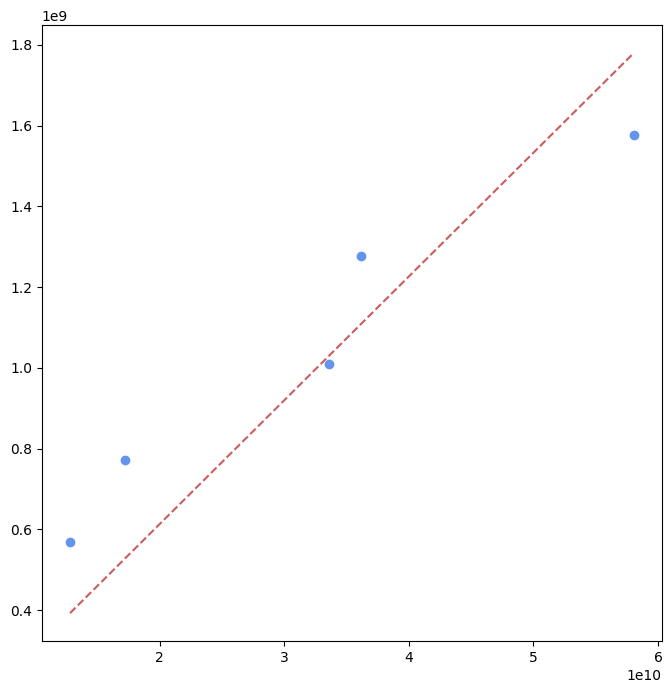

In [60]:
waterXValues = waterWaveNumbers**3
waterYValues = waterDensity * waterAngularFrequencies**2

fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar(waterXValues, waterYValues, fmt="o", color="cornflowerblue")

def LinearFunc(x, m, c):
    return m * x + c

waterPars, waterCov = curve_fit(LinearFunc, waterXValues, waterYValues)

waterXRange = np.linspace(np.min(waterXValues), np.max(waterXValues), 100)
ax.plot(waterXValues, LinearFunc(waterXValues, waterPars[0], waterPars[1]), color="indianred", ls="dashed")